# Gráficos y métricas RM - Dataset 2

In [34]:
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [35]:
dataset = pd.read_csv("https://raw.githubusercontent.com/LucilaAllende/datos-tesina-2021/main/2022/datos_producidos/datos_chubut_completos.csv")
dataset

,anio,provincia,departamento,carneros,ovejas,borregos,capones,corderos_corderas,total_ovinos,kg_lana,finura,rinde,prom_humedad,total_lluvia,prom_t_max,prom_t_med,prom_t_min
0,2000-12-31,CHUBUT,BIEDMA,4627,88905,31529,41328,22410,188799,793900.0,20.39,59.21,51.55,231.24,21.89,16.40,9.20
1,2001-12-31,CHUBUT,BIEDMA,4933,94817,33626,44076,23900,201352,793900.0,19.01,59.03,55.70,331.87,21.22,13.77,9.34
2,2002-12-31,CHUBUT,BIEDMA,4506,86622,30720,40267,21835,183950,789230.0,20.53,57.17,65.37,28.61,22.58,15.30,10.22
3,2003-12-31,CHUBUT,BIEDMA,5148,98950,35092,45997,24942,210129,994710.0,20.57,58.14,60.17,217.48,19.59,10.28,10.13
4,2004-12-31,CHUBUT,BIEDMA,4764,91580,32478,42571,23085,194478,1022730.0,20.68,57.63,61.66,285.58,21.41,13.12,8.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,2017-12-31,CHUBUT,TELSEN,4640,77556,27296,36570,17750,163812,637000.0,19.11,56.01,47.17,660.10,16.60,10.93,5.03
347,2018-12-31,CHUBUT,TELSEN,4832,79117,28366,37558,21933,171806,637000.0,20.38,54.64,47.93,604.20,17.63,11.33,5.03
348,2019-12-31,CHUBUT,TELSEN,4781,80109,28428,38109,17731,169158,613021.5,16.88,53.83,47.57,358.40,17.53,11.17,4.83
349,2020-12-31,CHUBUT,TELSEN,2870,79157,25804,36901,18984,163716,614250.0,21.55,52.96,46.63,304.40,16.60,10.60,4.63


## Primera Predicción: Lana

Variables independientes: 
- Cantidad total de lluvia acumulada de cada año (mm)
- Cantidad total de ovinos de cada año (animales)

Variables dependientes:
- Kilos de lana producidos

Primero, estandarizamos el dataset, luego sobre esos datos armamos el conjunto de entrenamiento y prueba para entrenar el modelo que nos servira para hacer las predicciones.

In [5]:
num_attrs = ["total_lluvia", "total_ovinos"]
pipeline = ColumnTransformer([("numeric", StandardScaler(), num_attrs)])
X_primera_prediccion = pipeline.fit_transform(dataset)

standard_scaler = StandardScaler()
l_values = dataset[['kg_lana']]
scaled_values = standard_scaler.fit(l_values)
y_primera_prediccion = standard_scaler.transform(l_values)

In [6]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
                                                X_primera_prediccion, 
                                                y_primera_prediccion, 
                                                test_size=0.25
                                            )

In [7]:
lr_multiple_1 = linear_model.LinearRegression()

In [8]:
lr_multiple_1.fit(X_train_1, y_train_1)

LinearRegression()

In [9]:
Y_pred_multiple_1 = lr_multiple_1.predict(X_test_1)

Chequeamos de manera manual las primeras cinco predicciones contra los primeros cinco datos reales.

In [10]:
Y_pred_multiple_1[:5]

array([[-0.82392966],
       [ 0.51436973],
       [ 0.14870234],
       [-0.39706027],
       [-0.54734622]])

In [11]:
y_test_1[:5]

array([[-1.13047921],
       [ 1.05402164],
       [-0.13479721],
       [-0.26260475],
       [-0.61401069]])

### Métricas

#### Score

*Score*: Todos los algoritmos incluyen un método "score" que provee el resultado de un criterio de evaluación por defecto para aquel problema al que están orientados. De esta manera, el método score de un modelo de clasificación basado en árbol de decisión, devuelve la precisión del modelo, entendida como el porcentaje de valores clasificados correctamente con respecto al total de elementos. O una regresión lineal devuelve el coeficiente de determinación, o R2, entendida como el porcentaje de la variancia de la variable dependiente que es predecible a partir de la variable independiente.

In [12]:
print('Exactitud del modelo en entrenamiento:')
print(str(round(lr_multiple_1.score(X_train_1, y_train_1),4))+'%')

Exactitud del modelo en entrenamiento:
0.8226%


Interpretación: En este caso estamos usando los valores de entrenamiento, y el modelo predice con un 82% de exactitud.  

In [13]:
print('Exactitud del modelo en test:')
print(str(round(lr_multiple_1.score(X_test_1, y_test_1),4))+'%')

Exactitud del modelo en test:
0.7871%


Interpretación: En este caso estamos usando los valores de prueba, y el modelo predice con un 79% de exactitud. 

#### Varianza explicada

*Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. La mejor puntuación posible es 1.0, los valores más bajos son peores. Dentro de sklearn el método es **explained_variance_score**. 

In [14]:
print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test_1, Y_pred_multiple_1),4)))

Varianza Explicada:
0.7937


Interpretación: El modelo explica la variable de salida (lana) en un 79%.

#### Error medio absoluto

*Error medio absoluto* (**MAE**): Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. Mientras mas cercano a cero mejor. Dentro de sklearn el método es **mean_absolute_error**.

In [15]:
print('MAE:')
print(str(round(mean_absolute_error(y_test_1, Y_pred_multiple_1),4)))

MAE:
0.3247


Interpretación: Nos dice que el modelo se equivoca en promedio en un 32%, cada vez que predice un valor de lana. 

#### Error cuadrático medio

*Error cuadrático medio* (**MSE**): Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. Mientras mas cercano a cero mejor. Dentro de sklearn el método es **mean_squared_error**.

In [16]:
print('MSE:')
print(str(round(mean_squared_error(y_test_1, Y_pred_multiple_1),4)))

MSE:
0.215


Interpretación: Nos dice que el modelo se equivoca en promedio en un 21%, cada vez que predice un valor de lana, en este caso penalizando los errores grandes. 

#### Raíz cuadrada del MSE

*Raíz cuadrada de la media del error al cuadrado* (**RMSE**): Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. Mientras mas cercano a cero mejor. Dentro de sklearn el método es **mean_squared_error** y a este se le saca la raíz cuadrada. 

In [17]:
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test_1, Y_pred_multiple_1),4)),4)))

RMSE:
0.4637


Interpretación: Nos dice que el modelo se equivoca en promedio un 46%, cada vez que predice un valor de lana.

#### R cuadrado

*R cuadrado* (**R2**): Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. El R cuadrado, también llamado coeficiente de determinación, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será. Dentro de sklearn el método es **r2_score**.

In [18]:
print('R2:')
print(str(round(r2_score(y_test_1, Y_pred_multiple_1),4)))

R2:
0.7871


Interpretación: El modelo explica en un 79% la variable de salida, en este caso los kilos de lana.

El problema del coeficiente de determinación, y razón por el cual surge el coeficiente de determinación ajustado, radica en que no penaliza la inclusión de variables explicativas no significativas. Es decir, si al modelo se añaden cinco variables explicativas que guardan poca relación con lo que se intenta predecir, el R cuadrado aumentará. Es por ello que muchos expertos económetras, estadísticos y matemáticos se oponen al uso del R cuadrado como medida representativa de la bondad del ajuste real.

#### R cuadrado ajustado

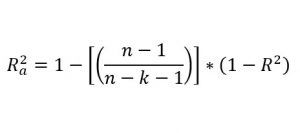
https://economipedia.com/definiciones/r-cuadrado-ajustado-coeficiente-de-determinacion-ajustado.html

In [19]:
def r2_ajustado(n,k,r2):
    return round(1-((n-1)/(n-k-1))*(1-r2),4)

r2 = r2_score(y_test_1, Y_pred_multiple_1)
k = 2
n = len(y_test_1)
resultado = r2_ajustado(n,k,r2)
print('R2 ajustado:')
print(resultado)

R2 ajustado:
0.7821


Interpretación: El modelo explica en un 78% la variable de salida, en este caso los kilos de lana. Es decir la bondad de ajuste es del 78%.

### Gráficos predición de lana

#### Gráfico regresión lineal múltiple

In [21]:
######################################## Data preparation #########################################
X = X_primera_prediccion.reshape(-1,2)
Y = y_primera_prediccion

In [29]:
x_pred = np.linspace(-0.54, 6, 30)  # range of cant_lluvia values
y_pred = np.linspace(-1.15, 4, 30)  # range of total_ovinos values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [30]:
######################## Prepare model data point for visualization ###############################
x = X[:, 0]
y = X[:, 1]
z = Y

In [31]:
################################################ Train #############################################
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

In [32]:
############################################## Evaluate ############################################
r2 = model.score(X, Y)

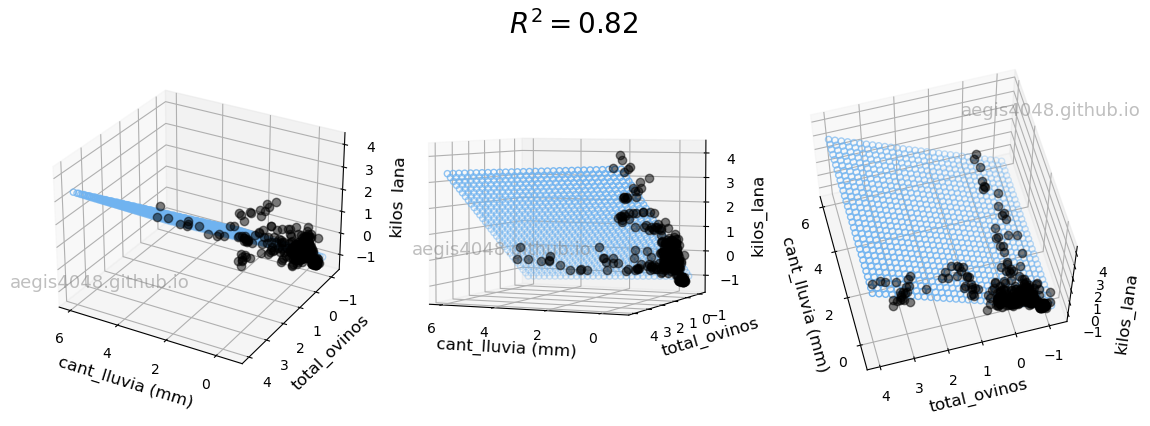

In [33]:
############################################## Plot ################################################
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x.flatten(), y.flatten(), z.flatten(), color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('cant_lluvia (mm)', fontsize=12)
    ax.set_ylabel('total_ovinos', fontsize=12)
    ax.set_zlabel('kilos_lana', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

#### Gráfico predicción vs real

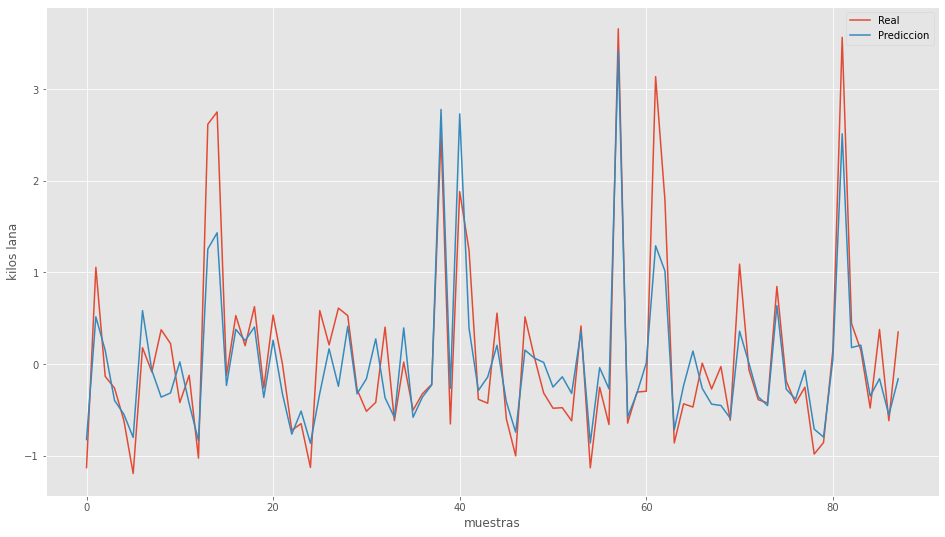

In [20]:
plt.plot(range(len(y_test_1)),y_test_1,label="Real")
plt.plot(range(len(Y_pred_multiple_1)),Y_pred_multiple_1,label="Prediccion")
plt.xlabel('muestras')
plt.ylabel('kilos lana')
plt.legend()
plt.show()

## Segunda predicción: Corderos

Variables independientes:

*   Cantidad total de lluvia acumulada de cada año (mm)
*   Cantidad de ovejas

Variables dependientes:

* Cantidad de corderos

Primero, estandarizamos el dataset, luego sobre esos datos armamos el conjunto de entrenamiento y prueba para entrenar el modelo que nos servira para hacer las predicciones.

In [37]:
num_attrs = ["total_lluvia", "ovejas"]
pipeline = ColumnTransformer([("numeric", StandardScaler(), num_attrs),])
X_segunda_prediccion = pipeline.fit_transform(dataset)

standard_scaler = StandardScaler()
l_values = dataset[['corderos_corderas']]
scaled_values = standard_scaler.fit(l_values)
y_segunda_prediccion = standard_scaler.transform(l_values)

In [38]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
                                                X_segunda_prediccion, 
                                                y_segunda_prediccion, 
                                                test_size=0.25
                                            )

In [39]:
lr_multiple_2 = linear_model.LinearRegression()

In [40]:
lr_multiple_2.fit(X_train_2, y_train_2)

LinearRegression()

In [41]:
Y_pred_multiple_2 = lr_multiple_2.predict(X_test_2)

Chequeamos de manera manual las primeras cinco predicciones contra los primeros cinco datos reales.

In [42]:
Y_pred_multiple_2[:5]

array([[-0.47467766],
       [-0.63473851],
       [-0.87404187],
       [-0.56898178],
       [ 0.31461735]])

In [43]:
y_test_2[:5]

array([[-0.76919396],
       [-0.74243887],
       [-0.64202471],
       [-0.71089429],
       [ 0.20538489]])

### Métricas

#### Score

*Score*: Todos los algoritmos incluyen un método "score" que provee el resultado de un criterio de evaluación por defecto para aquel problema al que están orientados. De esta manera, el método score de un modelo de clasificación basado en árbol de decisión, devuelve la precisión del modelo, entendida como el porcentaje de valores clasificados correctamente con respecto al total de elementos. O una regresión lineal devuelve el coeficiente de determinación, o R2, entendida como el porcentaje de la variancia de la variable dependiente que es predecible a partir de la variable independiente.

In [44]:
print('Exactitud del modelo en entrenamiento:')
print(str(round(lr_multiple_2.score(X_train_2, y_train_2),4))+'%')

Exactitud del modelo en entrenamiento:
0.8899%


Interpretación: En este caso estamos usando los valores de entrenamiento, y el modelo predice con un 89% de exactitud.  

In [45]:
print('Exactitud del modelo en test:')
print(str(round(lr_multiple_2.score(X_test_2, y_test_2),4))+'%')

Exactitud del modelo en test:
0.8064%


Interpretación: En este caso estamos usando los valores de prueba, y el modelo predice con un 81% de exactitud. 

#### Varianza explicada

*Varianza explicada*: Representa el porcentaje de la varianza de la variable de salida que es explicado por el modelo. O sea esta métrica evalúa la variación o dispersión de los puntos de datos. La mejor puntuación posible es 1.0, los valores más bajos son peores. Dentro de sklearn el método es **explained_variance_score**. 

In [46]:
print('Varianza Explicada:')
print(str(round(explained_variance_score(y_test_2, Y_pred_multiple_2),4)))

Varianza Explicada:
0.8065


Interpretación: El modelo explica la variable de salida en un 81%.

#### Error medio absoluto

*Error medio absoluto* (**MAE**): Es la media de las diferencias absolutas entre el valor objetivo y el predicho. Al no elevar al cuadrado, no penaliza los errores grandes, lo que la hace no muy sensible a valores anómalos, por lo que no es una métrica recomendable en modelos en los que se deba prestar atención a éstos. Mientras mas cercano a cero mejor. Dentro de sklearn el método es **mean_absolute_error**.

In [47]:
print('MSE:')
print(str(round(mean_squared_error(y_test_2, Y_pred_multiple_2),4)))

MSE:
0.1344


Interpretación: Nos dice que el modelo se equivoca en promedio en un 13%, cada vez que predice la cantidad de corderos. 

#### Error cuadrático medio

*Error cuadrático medio* (**MSE**): Es simplemente la media de las diferencias entre el valor objetivo y el predicho al cuadrado. Al elevar al cuadrado los errores, magnifica los errores grandes, por lo que hay que utilizarla con cuidado cuando tenemos valores anómalos en nuestro conjunto de datos. Mientras mas cercano a cero mejor. Dentro de sklearn el método es **mean_squared_error**.

In [48]:
print('MSE:')
print(str(round(mean_squared_error(y_test_2, Y_pred_multiple_2),4)))

MSE:
0.1344


Interpretación: Nos dice que el modelo se equivoca un 13%, cada vez que predice la cantidad de corderos, porque esta penalizando los errores grandes. 

#### Raíz cuadrada del MSE

*Raíz cuadrada de la media del error al cuadrado* (**RMSE**): Es igual a la raíz cuadrada de la métrica anterior. La ventaja de esta métrica es que presenta el error en las mismas unidades que la variable objetivo, lo que la hace más fácil de entender. Mientras mas cercano a cero mejor. Dentro de sklearn el método es **mean_squared_error** y a este se le saca la raíz cuadrada. 

In [49]:
print('RMSE:')
print(str(round(np.sqrt(round(mean_squared_error(y_test_2, Y_pred_multiple_2),4)),4)))

RMSE:
0.3666


Interpretación: Nos dice que el modelo se equivoca en promedio 37%, cada vez que predice la cantidad de corderos.

#### R cuadrado

*R cuadrado* (**R2**): Esta métrica difiere de las anteriores, ya que compara nuestro modelo con un modelo básico que siempre devuelve como predicción la media de los valores objetivo de entrenamiento. La comparación entre estos dos modelos se realiza en base a la media de los errores al cuadrado de cada modelo. Los valores que puede tomar esta métrica van desde menos infinito a 1. Cuanto más cercano a 1 sea el valor de esta métrica, mejor será nuestro modelo. El R cuadrado, también llamado coeficiente de determinación, refleja la bondad del ajuste de un modelo a la variable que pretender explicar. Es importante saber que el resultado del coeficiente de determinación oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando explicar. De forma inversa, cuanto más cerca de cero, menos ajustado estará el modelo y, por tanto, menos fiable será. Dentro de sklearn el método es **r2_score**.

In [50]:
print('R2:')
print(str(round(r2_score(y_test_2, Y_pred_multiple_2),4)))

R2:
0.8064


Interpretación: El modelo explica en un 81% la variable de salida (corderos)

El problema del coeficiente de determinación, y razón por el cual surge el coeficiente de determinación ajustado, radica en que no penaliza la inclusión de variables explicativas no significativas. Es decir, si al modelo se añaden cinco variables explicativas que guardan poca relación con lo que se intenta predecir, el R cuadrado aumentará. Es por ello que muchos expertos económetras, estadísticos y matemáticos se oponen al uso del R cuadrado como medida representativa de la bondad del ajuste real.

#### R cuadrado ajustado

In [51]:
def r2_ajustado(n,k,r2):
    return round(1-((n-1)/(n-k-1))*(1-r2),4)

r2 = r2_score(y_test_2, Y_pred_multiple_2)
k = 2
n = len(y_test_2)
resultado = r2_ajustado(n,k,r2)
print('R2 ajustado:')
print(resultado)

R2 ajustado:
0.8018


Interpretación: El modelo explica en un 80% la variable de salida, en este caso la cantidad de corderos. Es decir la bondad de ajuste es del 80%.

### Gráficos predición de corderos

#### Gráfico regresión lineal múltiple

In [53]:
######################################## Data preparation #########################################
X = X_segunda_prediccion.reshape(-1,2)
Y = y_segunda_prediccion

In [59]:
x_pred = np.linspace(-0.54, 6, 30)   # range of cant_lluvia values
y_pred = np.linspace(-1.25, 4.2, 30)  # range of total_ovejas values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [60]:
######################## Prepare model data point for visualization ###############################
x = X[:, 0]
y = X[:, 1]
z = Y

In [61]:
################################################ Train #############################################
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

In [62]:
############################################## Evaluate ############################################
r2 = model.score(X, Y)

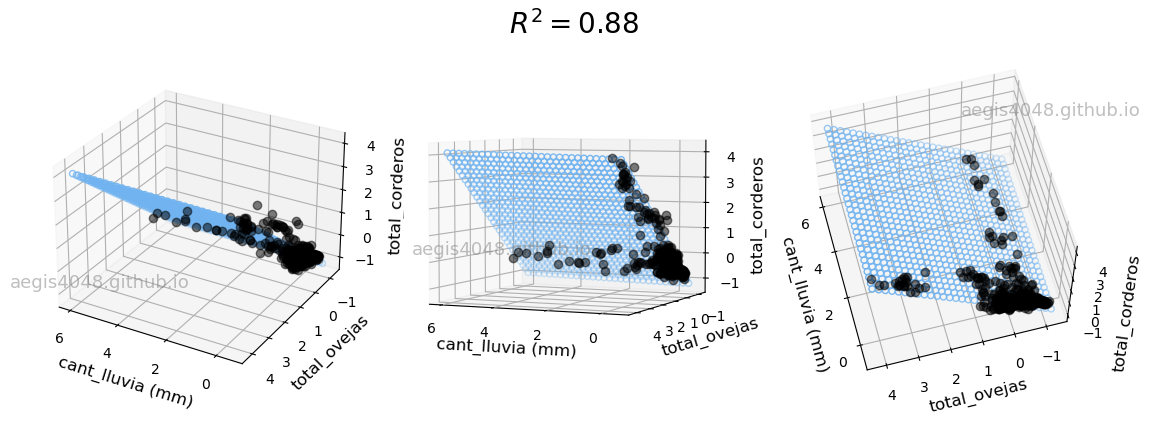

In [63]:
############################################## Plot ################################################

plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x.flatten(), y.flatten(), z.flatten(), color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('cant_lluvia (mm)', fontsize=12)
    ax.set_ylabel('total_ovejas', fontsize=12)
    ax.set_zlabel('total_corderos', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

#### Gráfico predicción vs real

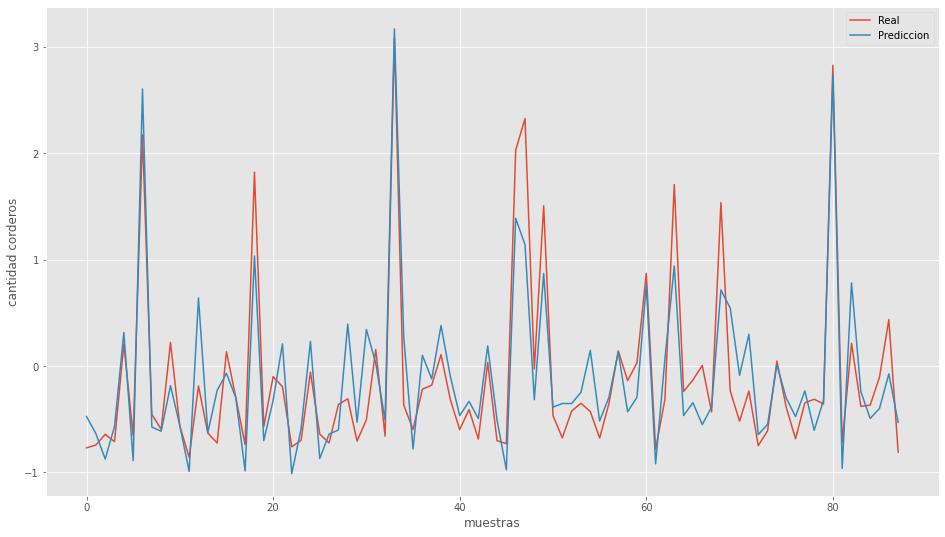

In [52]:
plt.plot(range(len(y_test_2)),y_test_2,label="Real")
plt.plot(range(len(Y_pred_multiple_2)),Y_pred_multiple_2,label="Prediccion")
plt.xlabel('muestras')
plt.ylabel('cantidad corderos')
plt.legend()
plt.show()